# Autoencoder Blue Graph (Min 8 Node)

### Import List

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import os
import random

C:\Users\KSY\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\KSY\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Method Definition

In [2]:
base_dir = "..\\..\\..\\data\\BLE_data\\"
def read_test_data(set_num, model_name, mode):
    if model_name == 5:
        raw_data = np.loadtxt(base_dir + "raw_data\\in_" + mode + "_" + str(set_num) + '.csv', delimiter=',', dtype=np.float32)
    elif model_name == 6:
        raw_data = np.loadtxt(base_dir + "raw_data\\out_" + mode + "_" + str(set_num) + '.csv', delimiter=',', dtype=np.float32)
    b_data    = raw_data[:,0:3]
    cell_data = raw_data[:,3:13]

    return b_data, cell_data

def read_denoised_test_data(set_num, model_name, mode):
    if model_name == 5:
        raw_data = np.loadtxt(base_dir + "filtered_data\\in_" + mode + "_" + str(set_num) + '_denoised.csv', delimiter=',', dtype=np.float32)
    elif model_name == 6:
        raw_data = np.loadtxt(base_dir + "filtered_data\\out_" + mode + "_" + str(set_num) + '_denoised.csv', delimiter=',', dtype=np.float32)
    b_data    = raw_data[:,0:3]
    cell_data = raw_data[:,3:13]

    return b_data, cell_data

def make_plot(y, num, begin, end):  
    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('xkcd:white')
    x = range(len(y))
    plt.bar(x, y, color="blue")
    plt.axis([0, num, begin, end])
    plt.show()

## Start

In [3]:
# model_name: 5 (car_in) / 6 (car_out)
# Car-in data
model_name = 5
set_num = 6000
train_set_num = int(set_num * 0.75)
test_set_num = int(set_num * 0.25)

x_in_train_noisy, y_in_train_noisy = read_test_data(train_set_num, model_name, "train")
x_in_train_denoised, y_in_train_denoised = read_denoised_test_data(train_set_num, model_name, "train")
x_in_test_noisy, y_in_test_noisy = read_test_data(test_set_num, model_name, "test")
x_in_test_denoised, y_in_test_denoised = read_denoised_test_data(test_set_num, model_name, "test")

In [4]:
# model_name: 5 (car_in) / 6 (car_out)
# Car-out data
model_name = 6
set_num = 6000
train_set_num = int(set_num * 0.75)
test_set_num = int(set_num * 0.25)

x_out_train_noisy, y_out_train_noisy = read_test_data(train_set_num, model_name, "train")
x_out_train_denoised, y_out_train_denoised = read_denoised_test_data(train_set_num, model_name, "train")
x_out_test_noisy, y_out_test_noisy = read_test_data(test_set_num, model_name, "test")
x_out_test_denoised, y_out_test_denoised = read_denoised_test_data(test_set_num, model_name, "test")

In [5]:
# Car-in
ae_x_in_train_noisy = x_in_train_noisy.astype('float32') / -100.
ae_x_in_train_denoised = x_in_train_denoised.astype('float32') / -100.
ae_x_in_test_noisy = x_in_test_noisy.astype('float32') / -100.
ae_x_in_test_denoised = x_in_test_denoised.astype('float32') / -100.

In [6]:
# Car-out
ae_x_out_train_noisy = x_out_train_noisy.astype('float32') / -100.
ae_x_out_train_denoised = x_out_train_denoised.astype('float32') / -100.
ae_x_out_test_noisy = x_out_test_noisy.astype('float32') / -100.
ae_x_out_test_denoised = x_out_test_denoised.astype('float32') / -100.

## Autoencoder - Denoising (Car in)

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model

autoencoder_01 = load_model('autoencoder_01.h5')

Using TensorFlow backend.


Autoencoder 01

Beacon 01



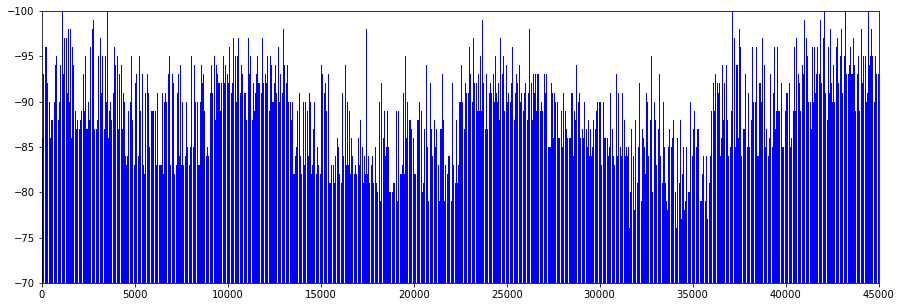

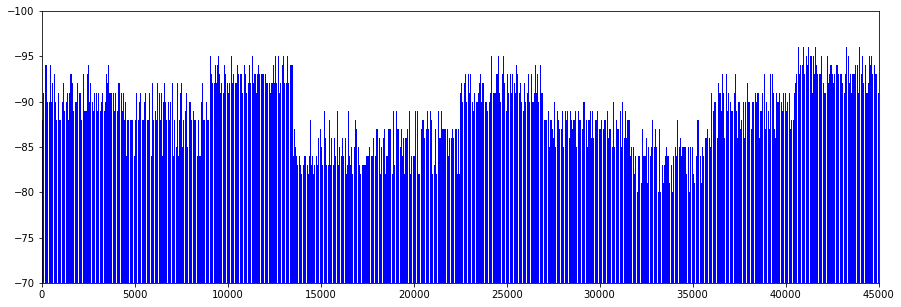

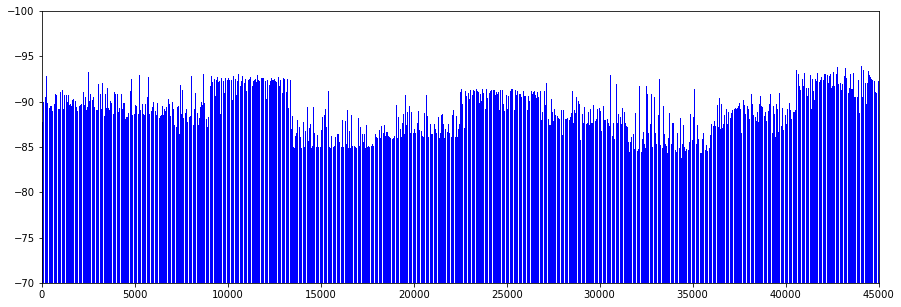

In [8]:
begin = -70
end = -100

print('Autoencoder 01\n')
print('Beacon 01\n')

y = x_in_train_noisy[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_in_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

Autoencoder 01

Beacon 02



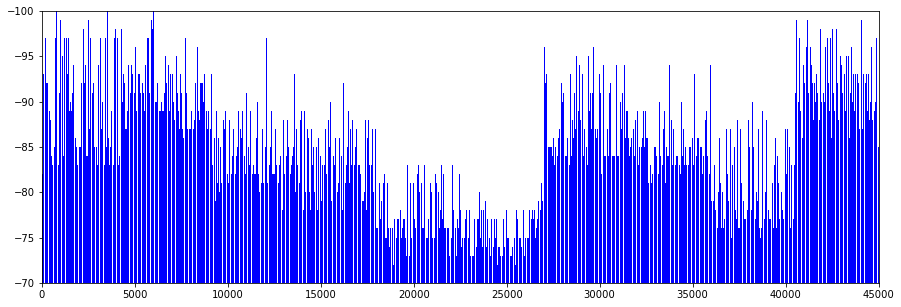

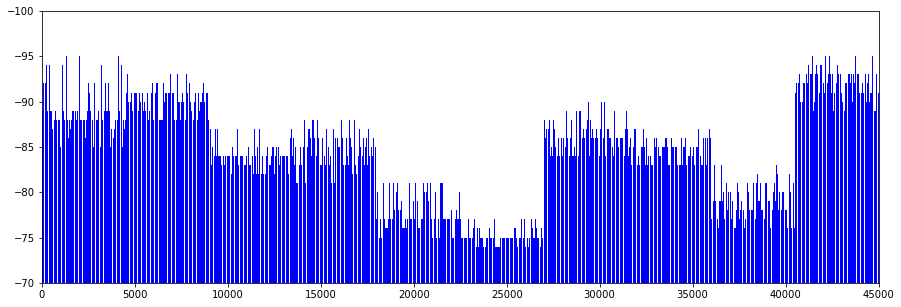

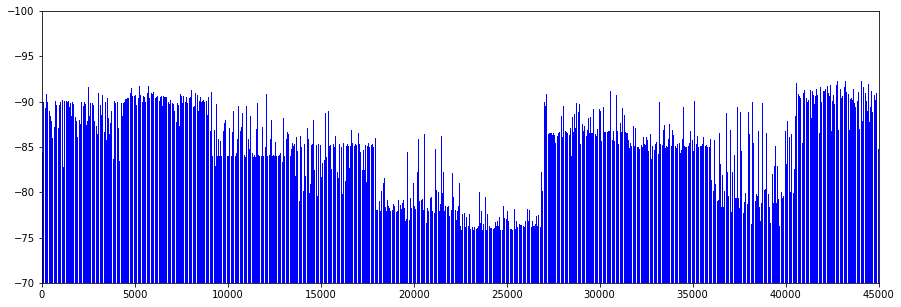

In [9]:
begin = -70
end = -100

print('Autoencoder 01\n')
print('Beacon 02\n')

y = x_in_train_noisy[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_in_train_denoised[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [1]].T[0], train_set_num * 10, begin, end)

Autoencoder 01

Beacon 03



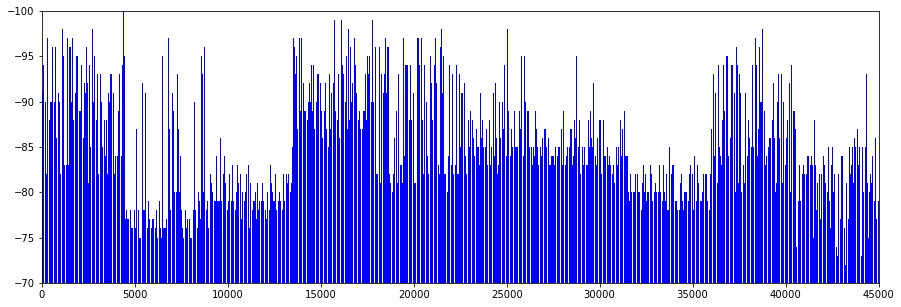

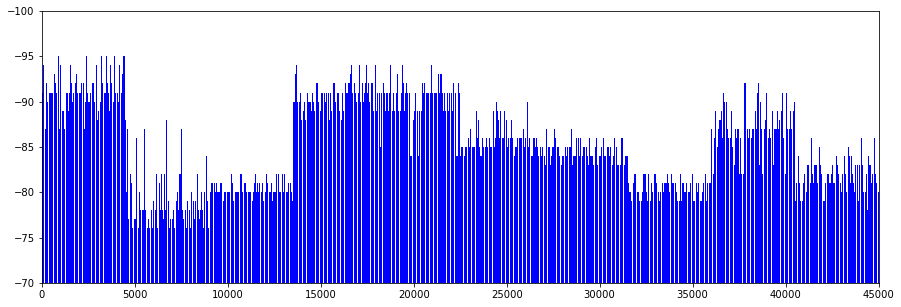

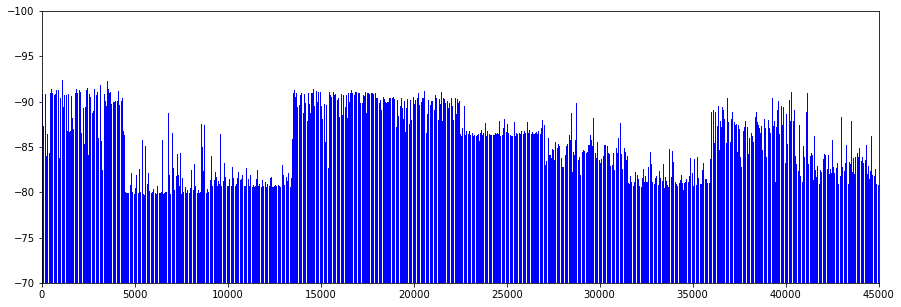

In [10]:
begin = -70
end = -100

print('Autoencoder 01\n')
print('Beacon 03\n')

y = x_in_train_noisy[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_in_train_denoised[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [2]].T[0], train_set_num * 10, begin, end)

## Autoencoder - Denoising (Car out)

In [11]:
# create autoencoder
# autoencoder_02 : Denoising (Car out)

autoencoder_02 = load_model('autoencoder_02.h5')

Autoencoder 02

Beacon 01



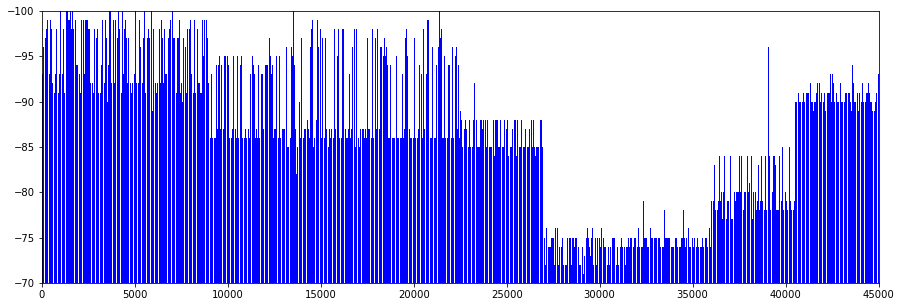

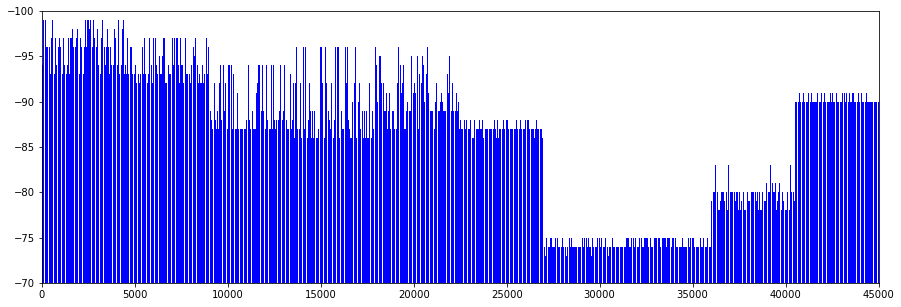

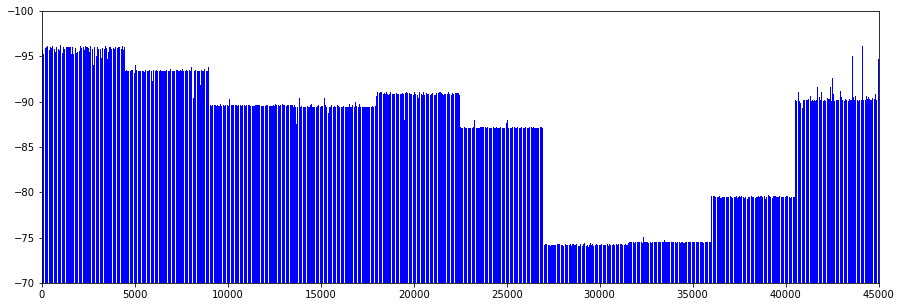

In [12]:
begin = -70
end = -100

print('Autoencoder 02\n')
print('Beacon 01\n')

y = x_out_train_noisy[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_02.predict(ae_x_out_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

Autoencoder 02

Beacon 02



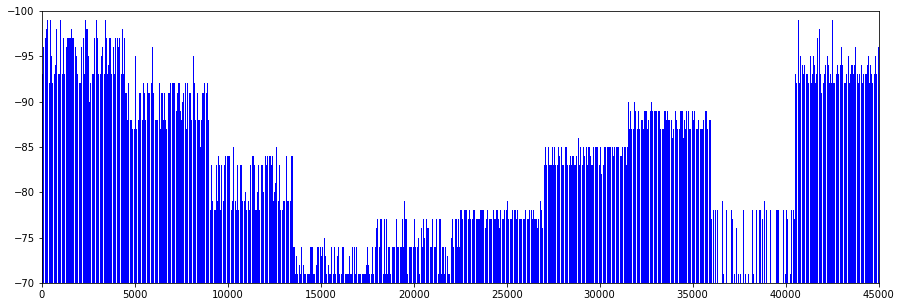

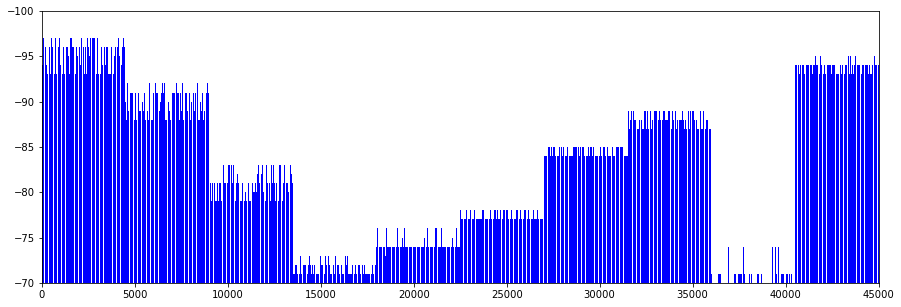

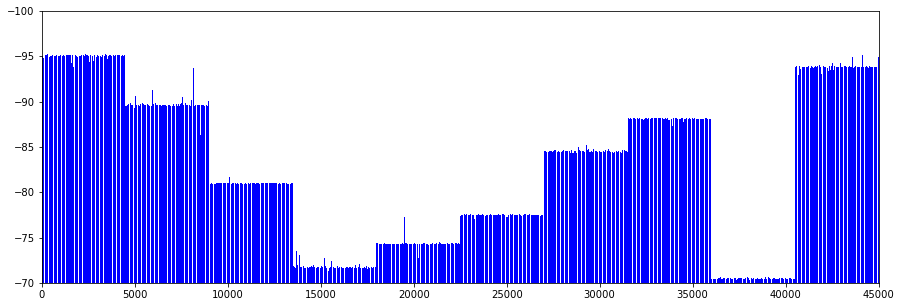

In [13]:
begin = -70
end = -100

print('Autoencoder 02\n')
print('Beacon 02\n')

y = x_out_train_noisy[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_02.predict(ae_x_out_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [1]].T[0], train_set_num * 10, begin, end)

Autoencoder 02

Beacon 03



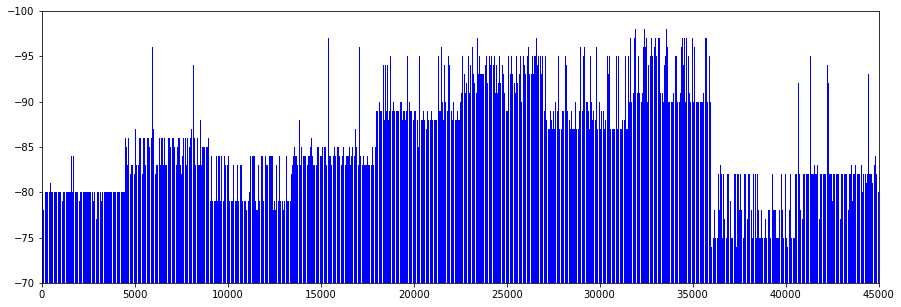

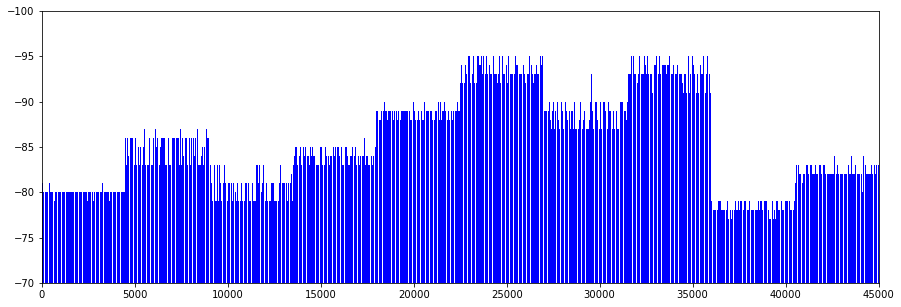

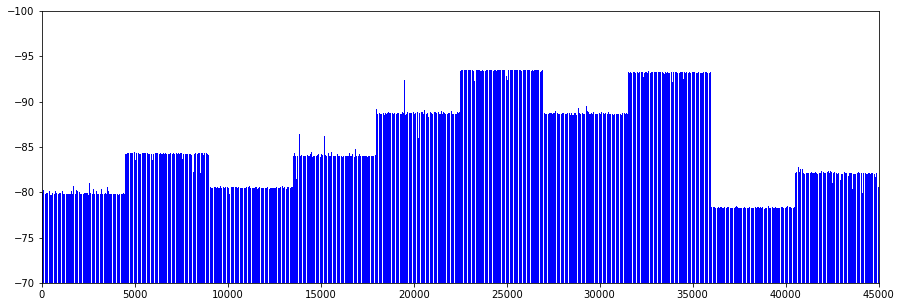

In [14]:
begin = -70
end = -100

print('Autoencoder 02\n')
print('Beacon 03\n')

y = x_out_train_noisy[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_02.predict(ae_x_out_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [2]].T[0], train_set_num * 10, begin, end)

## Autoencoder - Converting

## Description
- Autoencoder
    - Car in (noisy)를 Autoencoder에 넣은 결과 Car in (denoised)
    - Car in (denoised) 입력
    - Car out (denoised) 정답

In [15]:
# create autoencoder
# autoencoder_03 : Converting

autoencoder_03 = load_model('autoencoder_03.h5')

Autoencoder 03

Beacon 01



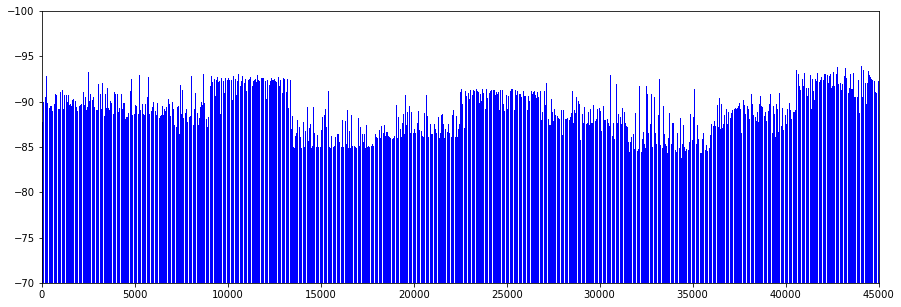

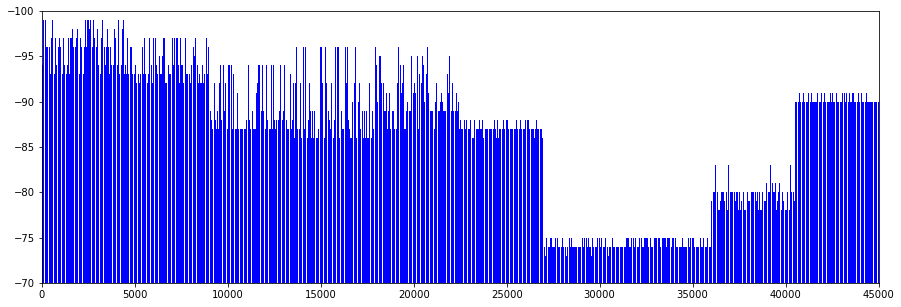

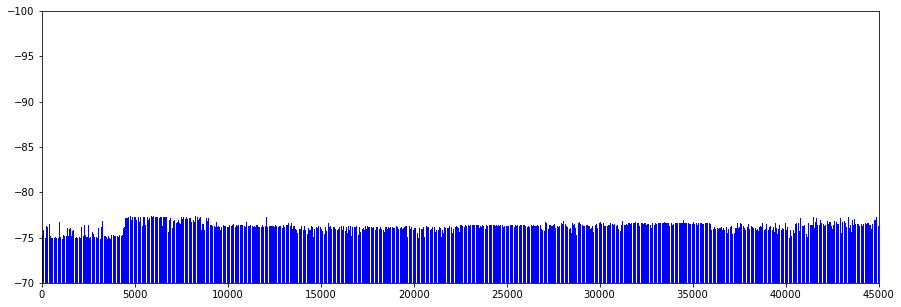

In [16]:
begin = -70
end = -100

print('Autoencoder 03\n')
print('Beacon 01\n')

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
y = after_autoencoder_x_train[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy)
after_autoencoder_x_train = autoencoder_03.predict(after_autoencoder_x_train) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

Autoencoder 03

Beacon 02



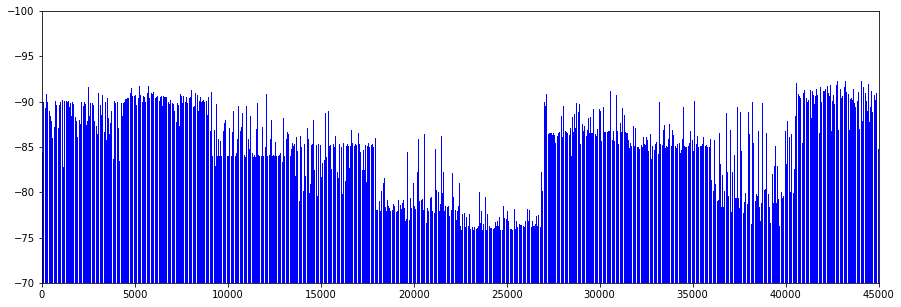

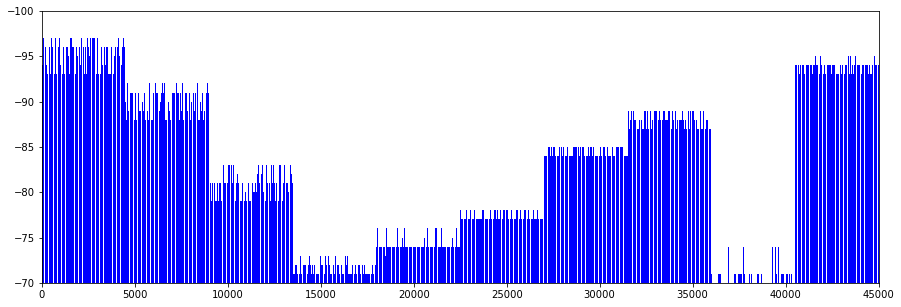

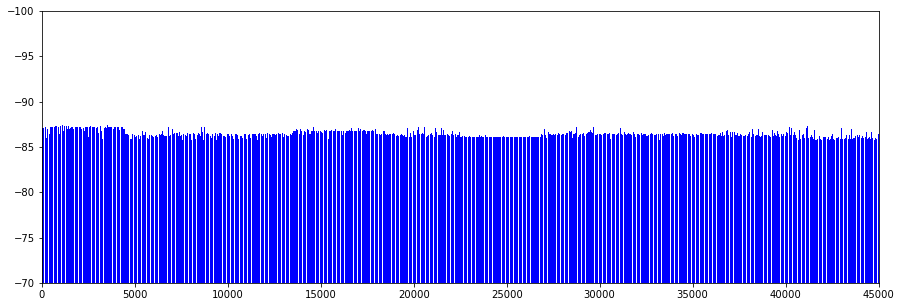

In [17]:
begin = -70
end = -100

print('Autoencoder 03\n')
print('Beacon 02\n')

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
y = after_autoencoder_x_train[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy)
after_autoencoder_x_train = autoencoder_03.predict(after_autoencoder_x_train) * (-100)
make_plot(after_autoencoder_x_train[:, [1]].T[0], train_set_num * 10, begin, end)

Autoencoder 03

Beacon 03



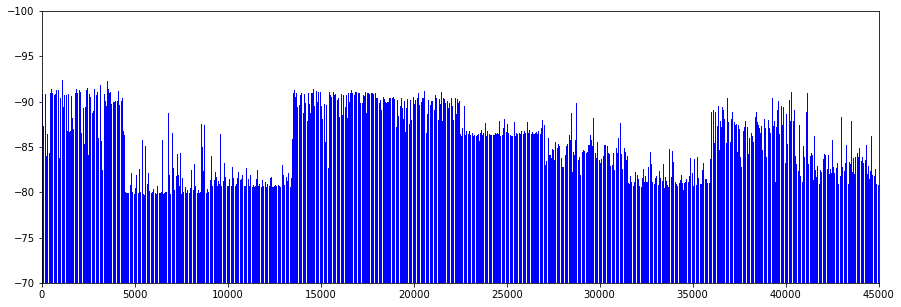

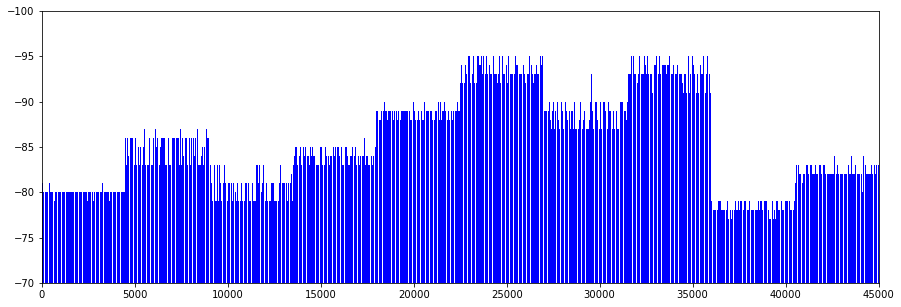

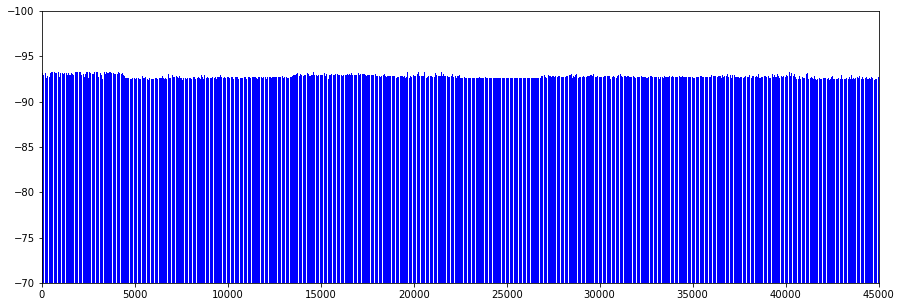

In [18]:
begin = -70
end = -100

print('Autoencoder 03\n')
print('Beacon 03\n')

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
y = after_autoencoder_x_train[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy)
after_autoencoder_x_train = autoencoder_03.predict(after_autoencoder_x_train) * (-100)
make_plot(after_autoencoder_x_train[:, [2]].T[0], train_set_num * 10, begin, end)

## Autoencoder - Converting

## Description
- Autoencoder
    - Car in (denoised) 입력
    - Car out (denoised) 정답

In [19]:
# create autoencoder
# autoencoder_04 : Converting

autoencoder_04 = load_model('autoencoder_04.h5')

Autoencoder 04

Beacon 01



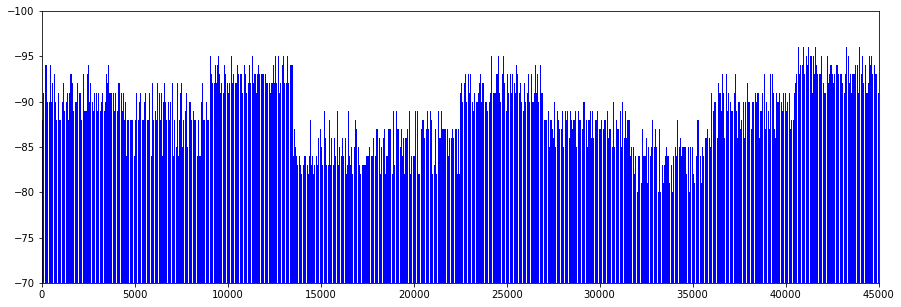

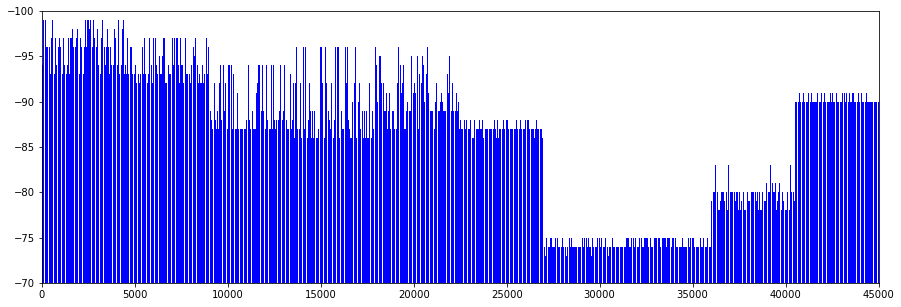

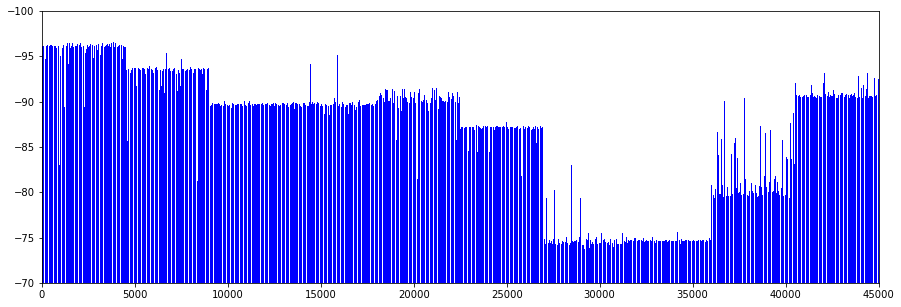

In [20]:
begin = -70
end = -100

print('Autoencoder 04\n')
print('Beacon 01\n')

y = x_in_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_04.predict(ae_x_in_train_denoised) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

Autoencoder 04

Beacon 02



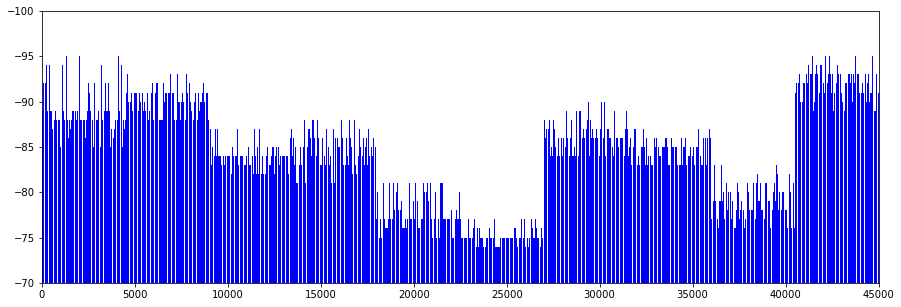

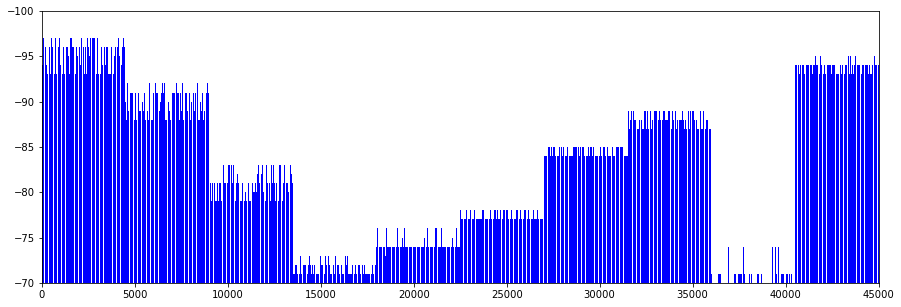

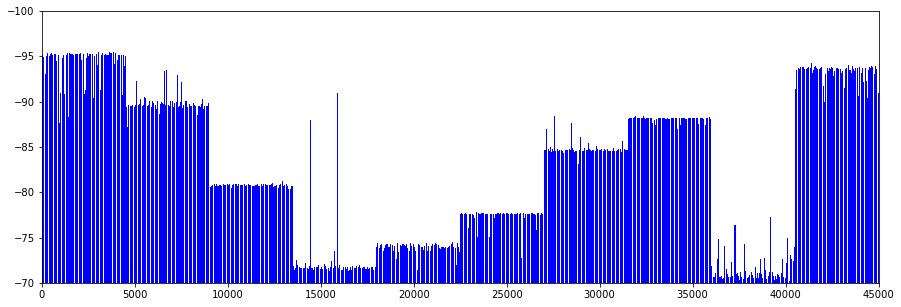

In [21]:
begin = -70
end = -100

print('Autoencoder 04\n')
print('Beacon 02\n')

y = x_in_train_denoised[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[1]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_04.predict(ae_x_in_train_denoised) * (-100)
make_plot(after_autoencoder_x_train[:, [1]].T[0], train_set_num * 10, begin, end)

Autoencoder 04

Beacon 03



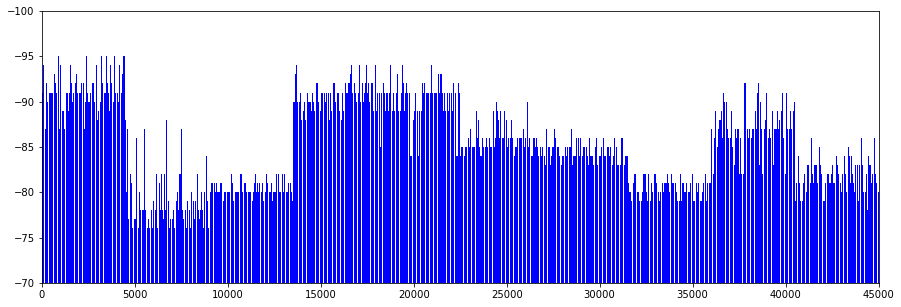

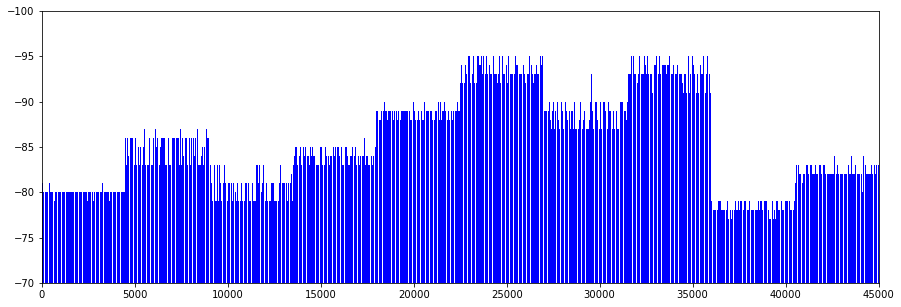

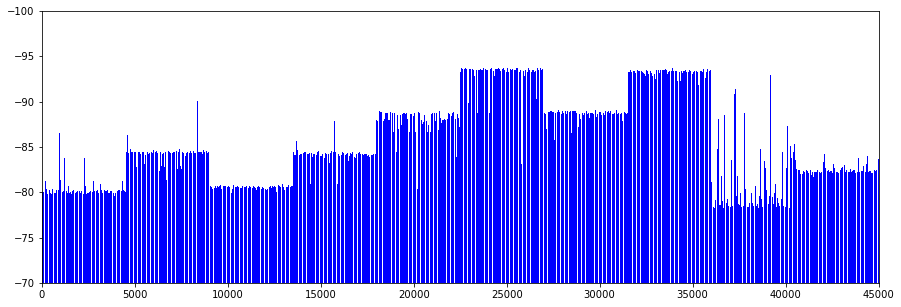

In [22]:
begin = -70
end = -100

print('Autoencoder 04\n')
print('Beacon 03\n')

y = x_in_train_denoised[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[2]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_04.predict(ae_x_in_train_denoised) * (-100)
make_plot(after_autoencoder_x_train[:, [2]].T[0], train_set_num * 10, begin, end)